## An end-to-end Scikit-Learn workflow

In [4]:
# Getting the data ready
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
hd = pd.read_csv("041 heart-disease.csv")
hd[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Create x features
x = hd.drop("target", axis=1)

#Create y features
y = hd["target"]

In [6]:
#Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

#Keep the default parameters for now
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
#Fit the model to the training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [8]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [9]:
# Making a prediction
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [10]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [11]:
y_preds = clf.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [12]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [13]:
# Evaluate the model on the training data
clf.score(x_train,y_train)

1.0

In [14]:
clf.score(x_test,y_test)

0.8524590163934426

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [16]:
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [17]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [18]:
# Improving a model
#Try diff amount of n_estimators
np.random.seed(7)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(x_train,y_train)
    print(f"Model accuracy on test set:{clf.score(x_test,y_test) * 100:.2f}%")
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set:78.69%
 
Trying model with 20 estimators...
Model accuracy on test set:83.61%
 
Trying model with 30 estimators...
Model accuracy on test set:85.25%
 
Trying model with 40 estimators...
Model accuracy on test set:81.97%
 
Trying model with 50 estimators...
Model accuracy on test set:85.25%
 
Trying model with 60 estimators...
Model accuracy on test set:83.61%
 
Trying model with 70 estimators...
Model accuracy on test set:83.61%
 
Trying model with 80 estimators...
Model accuracy on test set:85.25%
 
Trying model with 90 estimators...
Model accuracy on test set:83.61%
 


In [19]:
# Saving a model and loading it
import pickle

pickle.dump(clf, open("random-forest-model-1.pkl", "wb"))

In [20]:
loaded_model = pickle.load(open("random-forest-model-1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.8360655737704918

## 1. Getting our data ready to be used with machine learning
Threee main things we have to do:

    1. Split the data into features and labels(usually x & y)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values into numerical values(also called feature encoding) 

In [21]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
x = hd.drop("target", axis=1)
x[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y = hd["target"]
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

### 1.1 Making sure it's all numerical

In [25]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [26]:
len(car_sales)

1000

In [27]:
#Split into x/y
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

#Split into training and testing data sets
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2)

In [28]:
# #Build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# model.fit(x_train, y_train)
# model.score(x_test, y_test)

In [29]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder = "passthrough" )

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [31]:
#Let's refit the model
np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                    y,
                                                    test_size=0.2)

model.fit(x_train, y_train)

RandomForestRegressor()

In [32]:
model.score(x_test, y_test)

0.3362899219458084

### 1.2 What if there were missing values

1.Fill them with values(also known as imputation)

2.Removing the samples with missing data altogether

In [33]:
#Import the missing data
cs_missing = pd.read_csv("car-sales-extended-missing-data.csv")
cs_missing[:5]

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [34]:
cs_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [35]:
#Create x and y
x = cs_missing.drop("Price", axis =1)

y = cs_missing["Price"]

#### Option 1: Fill missing data with pandas

In [36]:
cs_missing[:5]

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [37]:
cs_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [38]:
# Fill the Make" column
cs_missing["Make"].fillna("missing", inplace=True)

cs_missing["Colour"].fillna("missing", inplace=True)

cs_missing["Odometer (KM)"].fillna(cs_missing["Odometer (KM)"].mean(), inplace=True)

cs_missing["Doors"].fillna(4, inplace=True)


In [39]:
cs_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [40]:
#Remove rows with missing Price values
cs_missing.dropna(inplace=True)
cs_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [41]:
len(cs_missing)

950

In [42]:
x = cs_missing.drop("Price", axis=1)
y = cs_missing["Price"]

In [43]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder = "passthrough" )

transformed_x = transformer.fit_transform(cs_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [44]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


#### Option 2. Filling values with scikit-learn

In [45]:
cs_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [46]:
cs_missing = pd.read_csv("car-sales-extended-missing-data.csv")
cs_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [47]:
cs_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [48]:
#Drop the rows with no labels
cs_missing.dropna(subset=["Price"], inplace=True)
cs_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [49]:
#Split into x and y
x = cs_missing.drop("Price", axis=1)
y = cs_missing["Price"]

In [50]:
#Fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="misssing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#Create an imputer(sth that fills data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

#Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [51]:
cs_filled = pd.DataFrame(filled_x,
                         columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
cs_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [52]:
cs_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [53]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder = "passthrough" )

transformed_x = transformer.fit_transform(cs_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [54]:
#Now we've got our data as numbers and filled(no missing values)
#Let's fit a model
np.random.seed(7)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)



RandomForestRegressor()

In [55]:
model.score(x_test,y_test)

0.09391688753545113

## 2. Choosing the right estimator/algorithm for our problem

Scikit-learn uses estimator as another term for machine learning model or algorithm

* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number

### 2.1 Picking a machine learning model for a regression problem

In [56]:
#Import the built in boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;


In [57]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston['target'])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [58]:
#Let's trythe Ridge regression model
from sklearn.linear_model import Ridge

#Setup random seed
np.random.seed(42)

#Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

#Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

#Instantiate ridge model
model = Ridge()
model.fit(x_train,y_train)

model.score(x_test,y_test)

0.6662221670168521

How do we improve this score?

What if Ridge was not working?


In [59]:
#Let's try the random forrest regressor
from sklearn.ensemble import RandomForestRegressor

np.random.seed(50)

#Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

#Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

#Instantiate ridge model
model = RandomForestRegressor()
model.fit(x_train,y_train)

#Evaluate the ransom forrest regressor
model.score(x_test,y_test)

0.9147552577490975

### 2.2. Choosing an estimator for classification problem

In [60]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
len(hd)

303

Consulting the map and it says to try LinearSVC

In [62]:
#Import the linear svc estimator class
from sklearn.svm import LinearSVC

np.random.seed(42)

#Create the data
x = hd.drop("target", axis=1)
y = hd["target"]

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

#Instantiate LinearSVC
clf = LinearSVC(max_iter=100000)
clf.fit(x_train, y_train)

#Evaluate the model
clf.score(x_test, y_test)


F:\ML Project\heart-disease-project\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8852459016393442

In [63]:
hd["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [64]:
#Import the RandomForrestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier 

np.random.seed(42)

#Create the data
x = hd.drop("target", axis=1)
y = hd["target"]

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

#Instantiate RandomForrestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

#Evaluate the model
clf.score(x_test, y_test)


0.8524590163934426

Tip:
    
    1. If we have structured data, use ensemble methods
    2. If we have unstructred data, use deep learning or transfer learning

## 3. Fit the model/algorithm to our data and use it to make predictions

### 3.1 Fitting the model to the data

In [65]:
#Import the RandomForrestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier 

np.random.seed(42)

#Create the data
x = hd.drop("target", axis=1)
y = hd["target"]

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

#Instantiate RandomForrestClassifier
clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(x_train, y_train)

#Evaluate the model
clf.score(x_test, y_test)


0.8524590163934426

## 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. predict() function
2. predict_proba() function

In [66]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [67]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [68]:
#Compare predictions to truth labels to evaluate the model

In [69]:
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [70]:
clf.score(x_test, y_test)

0.8524590163934426

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [72]:
#predict_proba() returns probabilities of a classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [73]:
#Let's predict on the same data
clf.predict(x_test.head())

array([0, 1, 1, 0, 1], dtype=int64)

In [74]:
x_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


predict() can also be used on regression models

In [75]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [76]:
from sklearn.ensemble import RandomForestRegressor

#Setup random seed
np.random.seed(42)

#Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

#Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

#Instantiate ridge model
model = RandomForestRegressor()
model.fit(x_train,y_train)

#Make predictions
y_preds = model.predict(x_test)

In [77]:
y_preds[:5]

array([23.081, 30.574, 16.759, 23.46 , 16.893])

In [78]:
y_test[:5]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: target, dtype: float64

In [79]:
y_test.shape

(102,)

In [80]:
y_preds.shape

(102,)

In [81]:
x_train[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [82]:
x_test[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27


In [83]:
#Compare thepresictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

## 4. Evaluating a Machine Learning Model
Three ways to evaluate scikit-learn models/estimators
1. Estimator `score` method
2. The `scoring` parameter
3. Problem specific metric functions

In [84]:
#Import the RandomForrestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier 

np.random.seed(42)

#Create the data
x = hd.drop("target", axis=1)
y = hd["target"]

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

#Instantiate RandomForrestClassifier
clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(x_train, y_train)

#Evaluate the model
clf.score(x_test, y_test)


0.8524590163934426

In [85]:
#Let's do the same for regression
from sklearn.ensemble import RandomForestRegressor

#Setup random seed
np.random.seed(42)

#Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

#Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

#Instantiate ridge model
model = RandomForestRegressor()
model.fit(x_train,y_train)



RandomForestRegressor()

In [86]:
model.score(x_test, y_test)

0.8654448653350507

### 4.2 Evaluating a model using the `scoring` parameter

In [87]:
from sklearn.model_selection import cross_val_score

#Import the RandomForrestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier 

np.random.seed(42)

#Create the data
x = hd.drop("target", axis=1)
y = hd["target"]

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

#Instantiate RandomForrestClassifier
clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(x_train, y_train)



RandomForestClassifier()

In [88]:
clf.score(x_test, y_test)

0.8524590163934426

In [89]:
cross_val_score(clf, x ,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [90]:
np.random.seed(42)

#single training and test score
clf_single_score = clf.score(x_test, y_test)

#Take the mean of 5-fold validation
clf_cross_val_score = np.mean(cross_val_score(clf, x, y))

#Compare the two
clf_single_score, clf_cross_val_score


(0.8524590163934426, 0.8248087431693989)

### 4.2.1 Classification model evaluaiton metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [91]:
from sklearn.model_selection import cross_val_score

#Import the RandomForrestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier 

np.random.seed(42)

#Create the data
x = hd.drop("target", axis=1)
y = hd["target"]

clf = RandomForestClassifier()
c_v_s = cross_val_score(clf, x, y)


In [92]:
cross_validated_score = round(np.mean(c_v_s)*100, 2)
cross_validated_score

82.48

**Area under the receiver operating characteristic curve(AUC/ROC)**
* Area under curve(AUC) 
* ROC curve

ROCs are a comparison of a model's true positive rate(tpr) versus a model's false positive rate(fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.2)

In [94]:
from sklearn.metrics import roc_curve

clf.fit(x_train, y_train)

#Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:5]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57]])

In [95]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:5]

array([0.49, 0.83, 0.49, 0.28, 0.57])

In [96]:
#Calculate the fpr, tpr, thresholds
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

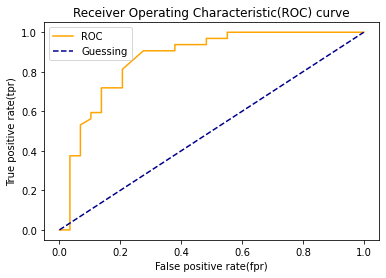

In [97]:
#Create a function for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate(fpr) and true positive rate(tpr) of 
    a model
    """
    #Plot ROC curve
    plt.plot(fpr,tpr,color="orange", label="ROC")
    #Plotline with no predictive power(baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    #Customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver Operating Characteristic(ROC) curve")
    plt.legend()
    plt.show
    
plot_roc_curve(fpr,tpr)

In [98]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

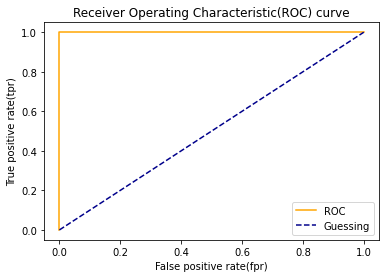

In [99]:
#Plot perfect ROC and auc curve 
fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [100]:
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A connfusion matrix is a quick way to compare the labels a model predicts and the actual 
labels it was supposed to predict

In essence, giving us an idea of where the model is getting confused

In [101]:
x_test.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3


In [102]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [103]:
#Visualize the confusion matrix with pd.crosstab
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual labels"],
            colnames=["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,23,6
1,6,26


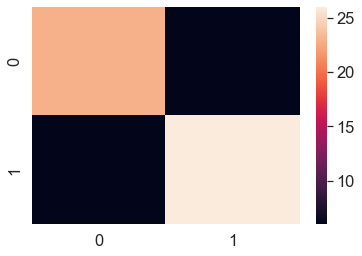

In [104]:
#Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

#Set the font scale
sns.set(font_scale=1.5)

#Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#Plot it using seaborn
sns.heatmap(conf_mat);

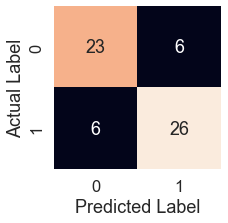

In [105]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    
plot_conf_mat(conf_mat)

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



To summarize classification metrics:
    
    **Accuracy** is a good measure to start with if all classes are balanced(i.e same  amount
      of samples that are labeled with 0 or 1)
    
    * Precision and recall become more important when classses are imbalanced
    
    * If false positive predictions are worse than false negatives then aim for higher precision
    
    * If false negative predictions are higher than false positoves then aim for higher recall
    * F1 score is a combination of precison and recall

### 4.2.2 Regression model evaluation metrics

**R^2**

In [107]:
#Let's do the same for regression
from sklearn.ensemble import RandomForestRegressor

#Setup random seed
np.random.seed(42)

#Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

#Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

#Instantiate ridge model
model = RandomForestRegressor()
model.fit(x_train,y_train)



RandomForestRegressor()

In [108]:
model.score(x_test, y_test)

0.8654448653350507

In [109]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean.mean()

21.488235294117647

In [110]:
r2_score(y_test, y_test_mean)

0.0

In [111]:
r2_score(y_test, y_test)

1.0

### 4.23 Using the `scoring` parameter

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = hd.drop("target", axis=1)
y = hd["target"]

clf = RandomForestClassifier()

cv_acc = cross_val_score(clf, x, y)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [113]:
print(f"The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is: 82.48%


In [114]:
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y, scoring="accuracy")
print(f"The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is: 82.48%


In [115]:
#Precision
cv_precision = cross_val_score(clf, x, y, scoring="precision")
np.mean(cv_precision)

0.8085601538512754

In [116]:
#Recall
cv_recall = cross_val_score(clf, x, y, scoring="recall")
np.mean(cv_recall)

0.8424242424242424

Regression model:

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor()


In [118]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, scoring=None)
f"{np.mean(cv_r2)*100:.2f}"

'62.44'

In [119]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, scoring="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [120]:
#Mean absolute error
cv_mae = cross_val_score(model, x, y, scoring="neg_mean_absolute_error")
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [121]:
#Mean squared error
cv_mse = cross_val_score(model, x, y, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.12863512415064

### 4.3 Using different evaluation metrics as scikit-learn function

**Classification Evaluation Functions**

In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = hd.drop("target", axis=1)
y = hd["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

#Make predictions
y_preds = clf.predict(x_test)

#Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")



Classifier metrics on the test set
Accuracy: 85.25
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [123]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

#Make predictions
y_preds = model.predict(x_test)

#Evaluate the classifier
print("Classifier metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")




Classifier metrics on the test set
R^2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


## Improving a model

First predictions =baseline predictions
First model = baseline model

From a data perspective:
* Could we collect more data? (generally the more data, the better)
* Could we improve our data

From a model prespective:
* Is there a better model?
* Could we improve the current model?

Hyperparameters vs Parameters:
* Parameters = model finds these patterns in data
* Hyperparameter = settings on a model we can adjust to potentially improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridasearchCV

### Tuning Hyperparameters

In [124]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
np.random.seed(42)

# Shuffle the data
hd = hd.sample(frac=1)

# Split into X & y
x = hd.drop("target", axis=1)
y = hd["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(hd)) # 70% of data
valid_split = round(train_split + 0.15 * len(hd)) # 15% of data
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make predictions
y_preds = clf.predict(x_valid)

# Evaluate the classifier
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [141]:
np.random.seed(42)

# Create a second classifier
clf_2 = RandomForestClassifier(n_estimators=500)
clf_2.fit(X_train, y_train)

# Make predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


## Hyperparameter Tuning using RandomizedSearchCV

In [142]:
# Hyperparameter grid RandomizedSearchCV will search over
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

In [143]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
x = hd.drop("target", axis=1)
y = hd["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Set n_jobs to -1 to use all cores 
clf = RandomForestClassifier(n_jobs=-1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=  18.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features

In [144]:
# Find the best hyperparameters found by RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10}

In [145]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83
